# Report for 2D Project Physical World and Digital World

Cohort: F07

Team No.: # Enter your team number

Members:
* Philip Andrew Wee De Wang (1003342)
* Nicholas Lim Jun Yuan ()
* Stephen Alvin (1003309)
* Bhuvaneswari Sithanathan (1003798)


# Introduction

Write your introduction here. Describe the problem you want to solve and a brief of your approach and summary of your result.

Problem:
We wish to measure the temperature of a bottle, but we only wish to use the first 10 seconds of data in order to obtain the temperature at the 2 minute mark within 0.1 degrees celcius accuracy.

Approach:
We will measure the temperature every second for 10 seconds, starting at 25 degrees celcius and at the end of 10 seconds we will run the collected data through our trained model to predict the temperature at the 2 minute mark

Summary:



# Description of Data from Experiment

## Data Collection

Describe how you collect your data and the reasoning behind such approach.

How data is collected:
1. If the water is higher temperature than the room, wait for the temperature increase to 26 degrees celcius, if not wait for the water to decrease to 24 degrees celcius
2. Every second afterward, record the temperature of the water with the sensor.
3. Wait for 2 minutes and record the temperature of the water with the thermometer

Reasoning:
1. It is imperative that the starting temperature is always the same. Hence we write the program such that it starts at 26 degrees celcius, or 24 degrees celcius, making a constant starting point for both increasing and decreasing of temperatures
2. By collecting the data at every second, we are able to have more data points and thus more accurately determine the final temperature
3. Waiting 2 minutes should suffice for the thermometer to come within 0.1 degrees celcius of the actual water temperature, allowing us to know the actual temperature


## Data Preparation

The data is prepared in a .txt file in the below format (Not actual result):
```
Experiment
Final Temp: 37
1     24.2
2     25.2
3     26.2
4     27.2
5     28.2
6     29.2
7     30.2
8     31.2
9     32.2
10    33.2

Experiment
Final Temp: 37
1     24.2
2     25.2
3     26.2
4     27.2
5     28.2
6     29.2
7     30.2
8     31.2
9     32.2
10    33.2
```
Subsequent experiments will also be appended to the text file accordingly. This format allows us to easily code a program to store these values

## Data Format

Describe your data and its features. Include any codes or visualization of data.

When our model is trained, it is plotted on a 11 dimensional hyperplane which best fits the data provided.

When 10 dimensions of temperature corresponding to each second mark is provided, it then places these points on the hyperplane and determines the corresponsind 11th dimension of final temperature.

# Training Model

Describe how you train your model. Include any code and output

# Verification and Accuracy

Describe how you check the accuracy of your model and its result. State any analysis you have and the steps you have taken to improve its accuracy.

# Example Scripts

Instruction:

* Read an excel file with the following format:
```
time (s)	reading
0.00	    25.812
0.90	    28.562
1.79	    31.875
2.68	    35.062
3.55	    37.937
4.43	    40.687
5.30	    43.25
```
where the first column indicates the time in seconds and the second column indicates the sensor reading in Celsius. 
* Write a code to prepare the data, extract the features.
* Write a code to split the data.
* Write a code to train the model.
* Write a code to predict the final temperature.
* Write a code to check accuracy.

**The script below is just for your example. You don't have to use it and you can write your own script.**



In [155]:
#Necessary Imports
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [156]:
filename = 'NUDES'

# code to read txt file

# open the file
f = open('{}.txt'.format(filename),'r')

#create an array to store the data
data = [['final temp','1s','2s','3s','4s','5s','6s','7s','8s','9s','10s']]

# iterate through the lines in the file
for line in f:
    if line.strip() == 'Experiment:':
        data_row = []
        
        #Get the final temp
        final_temp_line = f.readline()
        final_temp_array = final_temp_line.split(" ")
        final_temp = final_temp_array[2].strip()
        data_row.append(final_temp)
        
        
        #Get the individual temp
        for i in range(10):
            temp_line = f.readline()
            temp_array = temp_line.split(" ")
            temp_at_time = temp_array[1].strip()
            data_row.append(temp_at_time)
        
        data.append(data_row)

print(np.array(data))
f.close()

[['final temp' '1s' '2s' '3s' '4s' '5s' '6s' '7s' '8s' '9s' '10s']
 ['14.5' '22.625' '21.812' '21.062' '20.375' '19.812' '19.375' '18.875'
  '18.5' '18.125' '17.812']
 ['19.937' '23.062' '22.437' '22.0' '21.687' '21.375' '21.187' '21.0'
  '20.875' '20.75' '20.687']
 ['25.0' '24.125' '24.187' '24.25' '24.312' '24.375' '24.375' '24.437'
  '24.5' '24.5' '24.562']
 ['33.812' '29.562' '30.75' '31.5' '32.0' '32.375' '32.687' '32.875'
  '33.062' '33.187' '33.312']
 ['45.5' '32.375' '35.562' '37.75' '39.312' '40.562' '41.437' '42.187'
  '42.75' '43.187' '43.562']
 ['52.812' '36.875' '40.75' '43.5' '45.562' '47.125' '48.312' '49.25'
  '50.0' '50.562' '51.0']
 ['31.75' '26.875' '27.562' '28.375' '28.75' '29.187' '29.5' '29.687'
  '30.0' '30.125' '30.312']
 ['61.812' '44.0' '49.062' '51.5' '55.562' '56.75' '58.687' '59.312'
  '60.062' '60.375' '60.812']
 ['34.625' '27.875' '29.875' '30.937' '31.625' '32.062' '32.437' '32.687'
  '32.937' '33.125' '33.312']
 ['36.812' '30.375' '32.125' '33.25' '34.

In [157]:
def preprocess(data):
    #save the dataset
    dataset = data
    #split into x and y
    x_data = []
    y_data = []
    for row_no in range(1,len(dataset)):
       # print(dataset[row_no][0])
        y_data.append(dataset[row_no][0])
        x_data_row = []
        for col_no in range(1,len(dataset[0])):
            x_data_row.append(dataset[row_no][col_no])
        x_data.append(x_data_row)
#     x_data = dataset[1:,1:]
#     y_data = dataset[1:,0]
    return x_data,y_data

x_data,y_data = preprocess(data)
print(np.array(x_data),y_data)

[['22.625' '21.812' '21.062' '20.375' '19.812' '19.375' '18.875' '18.5'
  '18.125' '17.812']
 ['23.062' '22.437' '22.0' '21.687' '21.375' '21.187' '21.0' '20.875'
  '20.75' '20.687']
 ['24.125' '24.187' '24.25' '24.312' '24.375' '24.375' '24.437' '24.5'
  '24.5' '24.562']
 ['29.562' '30.75' '31.5' '32.0' '32.375' '32.687' '32.875' '33.062'
  '33.187' '33.312']
 ['32.375' '35.562' '37.75' '39.312' '40.562' '41.437' '42.187' '42.75'
  '43.187' '43.562']
 ['36.875' '40.75' '43.5' '45.562' '47.125' '48.312' '49.25' '50.0'
  '50.562' '51.0']
 ['26.875' '27.562' '28.375' '28.75' '29.187' '29.5' '29.687' '30.0'
  '30.125' '30.312']
 ['44.0' '49.062' '51.5' '55.562' '56.75' '58.687' '59.312' '60.062'
  '60.375' '60.812']
 ['27.875' '29.875' '30.937' '31.625' '32.062' '32.437' '32.687' '32.937'
  '33.125' '33.312']
 ['30.375' '32.125' '33.25' '34.0' '34.625' '35.187' '35.562' '35.875'
  '36.062' '36.187']
 ['32.437' '34.5' '35.875' '36.875' '37.562' '38.125' '38.5' '38.812'
  '39.062' '39.25']


Input which row to check: 6
['14.5', '19.937', '25.0', '33.812', '45.5', '52.812', '31.75', '61.812', '34.625', '36.812', '39.875', '49.625', '56.0', '60.625', '32.562', '30.937', '22.312', '30.437']
[[18.875 21.    24.437 32.875 42.187 49.25  29.687 59.312 32.687 35.562
  38.5   45.75  51.812 57.312 31.812 30.125 22.937 29.625]
 [14.5   19.937 25.    33.812 45.5   52.812 31.75  61.812 34.625 36.812
  39.875 49.625 56.    60.625 32.562 30.937 22.312 30.437]]


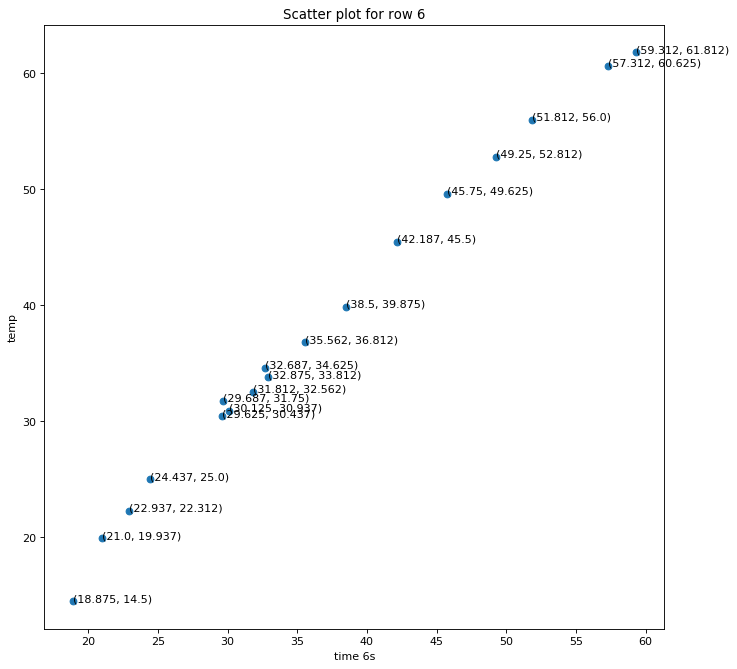

In [164]:
# Create data
z = int(input("Input which row to check: "))
x_col = np.array(x_data)[:,z].astype(float)

print(y_data)
y = [float(i) for i in y_data]

visual_data = np.array([x_col,y])
print(visual_data)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
# Plot
plt.scatter(x_col, y)
plt.title('Scatter plot for row {}'.format(z))
plt.xlabel('time {}s'.format(z))
plt.ylabel('temp')
for i_x, i_y in zip(x_col, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.show()


In [165]:
# write a code to split the data to train and test
def prepare_train_test(data,percentage_for_test):
    x_data,y_data = preprocess(data)
    #split further into testdata and practice data
    x_train,x_test,y_train,y_test = train_test_split(x_data,\
                                                     y_data,\
                                                     test_size = percentage_for_test)
    x_train =  np.array(x_train).astype(float)
    x_test =  np.array(x_test).astype(float)
    y_train =  np.array(y_train).astype(float)
    y_test =  np.array(y_test).astype(float) 
    
    return x_train,x_test,y_train,y_test

print(prepare_train_test(data,0.5))

(array([[28.5  , 29.062, 29.375, 29.625, 29.812, 30.   , 30.125, 30.25 ,
        30.312, 30.375],
       [32.437, 34.5  , 35.875, 36.875, 37.562, 38.125, 38.5  , 38.812,
        39.062, 39.25 ],
       [29.5  , 30.25 , 30.937, 31.312, 31.5  , 31.687, 31.812, 31.937,
        32.   , 32.062],
       [24.125, 24.187, 24.25 , 24.312, 24.375, 24.375, 24.437, 24.5  ,
        24.5  , 24.562],
       [23.062, 22.437, 22.   , 21.687, 21.375, 21.187, 21.   , 20.875,
        20.75 , 20.687],
       [23.75 , 23.562, 23.375, 23.25 , 23.125, 23.   , 22.937, 22.875,
        22.812, 22.75 ],
       [30.375, 32.125, 33.25 , 34.   , 34.625, 35.187, 35.562, 35.875,
        36.062, 36.187],
       [27.875, 29.875, 30.937, 31.625, 32.062, 32.437, 32.687, 32.937,
        33.125, 33.312],
       [44.   , 49.062, 51.5  , 55.562, 56.75 , 58.687, 59.312, 60.062,
        60.375, 60.812]]), array([[32.375, 35.562, 37.75 , 39.312, 40.562, 41.437, 42.187, 42.75 ,
        43.187, 43.562],
       [38.25 , 40.625, 42.

In [209]:
# write a code to train the model
# the function should return the trained model
def train_model(data, percentage_for_test):
    
    x_train,x_test,y_train,y_test = prepare_train_test(data,percentage_for_test)
    
    #create the linear regression model
    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)
    #predict the y values for a given c
    print(x_test)
    y_pred = model.predict(x_test)
#     print(y_pred)
    
    #calculate the R2,MSE,coef and intercept
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test,y_pred)
    coef = model.coef_
    intercept = model.intercept_
    #generate the results dictionary
    
    
    abs_error_vector = np.abs(y_test - y_pred)
    print('the abs error is ' + str(abs_error_vector))
    
    results = {"mean squared error" : MSE,
               "intercept" : intercept,
               "coefficients" : coef,
               "r2 score" : R2}
    return results,model

results,model = train_model(data,0.01)
print(results)

[[26.875 27.562 28.375 28.75  29.187 29.5   29.687 30.    30.125 30.312]]
the abs error is [0.09880865]
{'mean squared error': 0.009763148490579552, 'intercept': 0.7850370590002598, 'coefficients': array([-0.42837426,  0.44988925,  0.68640678,  3.53914662, -3.44063975,
       -2.68586895, -5.63890518,  6.50593578, -5.5142591 ,  7.48698441]), 'r2 score': 0.0}


In [217]:
# write a code to check your accuracy

prediction = [[42.375,47.437,50.812,52.437,53.687,54.625,55.437,56.062,56.5,56.812]]

prediction = np.array(prediction).astype(float)

print(prediction)
result = model.predict(prediction)
print(result)

[[42.375 47.437 50.812 52.437 53.687 54.625 55.437 56.062 56.5   56.812]]
[58.92749285]


In [147]:
# save the model
import pickle

with open("model.pickle", "wb") as output_file:
    pickle.dump(model, output_file)
    
with open("model.pickle", "r") as output_file:
    s = pickle.load(output_file)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 49: character maps to <undefined>